In [31]:
from sanitize_ml_labels import sanitize_ml_labels
from tqdm.auto import tqdm

In [32]:
from crr_prediction.meta_models import build_cnn_meta_model, build_mlp_meta_model

In [33]:
meta_cnn = build_cnn_meta_model(256)
meta_ffnn = build_mlp_meta_model(256)

In [34]:
from typing import Dict
import numpy as np


def random_space_sampling(space: Dict) -> Dict:
    """Return random space uniform sample."""
    return {
        key: np.random.uniform(low, high)
        for key, (_, low, high) in space.items()
    }


In [35]:
meta_cnn.space()

{'DenseRectangularMetaLayer_1_units': ('integer', 0, 64),
 'DenseRectangularMetaLayer_1_dropout_rate': ('real', 0, 0.5),
 'DenseRectangularMetaLayer_1_layers': ('integer', 0, 3),
 'DenseRectangularMetaLayer_0_units': ('integer', 0, 64),
 'DenseRectangularMetaLayer_0_dropout_rate': ('real', 0, 0.5),
 'DenseRectangularMetaLayer_0_layers': ('integer', 0, 3),
 'Conv2DRectangularMetaLayer_1_filters': ('integer', 0, 128),
 'Conv2DRectangularMetaLayer_1_x_kernel_size': ('integer', 2, 8),
 'Conv2DRectangularMetaLayer_1_y_kernel_size': ('integer', 1, 2),
 'Conv2DRectangularMetaLayer_1_dropout_rate': ('real', 0, 0.5),
 'Conv2DRectangularMetaLayer_1_layers': ('integer', 0, 3),
 'Conv2DRectangularMetaLayer_1_x_pool_size': ('integer', 1, 8),
 'Conv2DRectangularMetaLayer_1_y_pool_size': ('integer', 1, 2),
 'Conv2DRectangularMetaLayer_0_filters': ('integer', 0, 128),
 'Conv2DRectangularMetaLayer_0_x_kernel_size': ('integer', 2, 8),
 'Conv2DRectangularMetaLayer_0_y_kernel_size': ('integer', 1, 2),
 'C

In [36]:
meta_cnn.build(**random_space_sampling(meta_cnn.space())).summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 4)]          0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 256, 4, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 4, 26)        130       
_________________________________________________________________
batch_normalization_6 (Batch (None, 256, 4, 26)        104       
_________________________________________________________________
activation_7 (Activation)    (None, 256, 4, 26)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 4, 26)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 4, 26)         0   

In [37]:
import pandas as pd

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
report = pd.read_csv("complete_test_report.csv")
report_only_bayes = report[report.model.str.contains("bayes")]
useless_columns = ["holdout_number"]
metrics = list(report_only_bayes.columns[16:-15])
report_only_bayes = report_only_bayes.drop(columns=useless_columns)

In [41]:
for (task, cell_line, model), group in report_only_bayes.groupby(["task", "cell_line", "model"]):
    if cell_line != "GM12878":
        continue
    if task != "active_enhancers_vs_inactive_enhancers":
        continue
    group = group.dropna(axis=1)
    display(group.drop(columns=metrics).iloc[group.AUPRC.argmax()])

run_type                                                                        test
task                                          active_enhancers_vs_inactive_enhancers
cell_line                                                                    GM12878
DenseRectangularMetaLayer_0_dropout_rate                                    0.052981
DenseRectangularMetaLayer_0_layers                                               0.0
DenseRectangularMetaLayer_0_units                                               21.0
DenseRectangularMetaLayer_1_dropout_rate                                    0.463653
DenseRectangularMetaLayer_1_layers                                               0.0
DenseRectangularMetaLayer_1_units                                                0.0
model                                                                   bayesian_cnn
Conv2DRectangularMetaLayer_0_dropout_rate                                   0.256971
Conv2DRectangularMetaLayer_0_filters                             

run_type                                                                      test
task                                        active_enhancers_vs_inactive_enhancers
cell_line                                                                  GM12878
DenseRectangularMetaLayer_0_dropout_rate                                  0.316662
DenseRectangularMetaLayer_0_layers                                             1.0
DenseRectangularMetaLayer_0_units                                            227.0
DenseRectangularMetaLayer_1_dropout_rate                                  0.220702
DenseRectangularMetaLayer_1_layers                                             0.0
DenseRectangularMetaLayer_1_units                                             56.0
DenseRectangularMetaLayer_2_dropout_rate                                  0.076472
DenseRectangularMetaLayer_2_layers                                             2.0
DenseRectangularMetaLayer_2_units                                            170.0
Dens

In [11]:
import os
from glob import glob

useless_columns = [
    "episodes_total",
    "timesteps_total",
    "done",
    "experiment_id",
    "date",
    "timestamp",
    "time_total_s",
    "pid",
    "hostname",
    "node_ip",
    "time_since_restore",
    "timesteps_since_restore",
    "iterations_since_restore",
    "trial_id",
    "time_this_iter_s",
    "training_iteration",
    "logdir"
]

all_csv = []

for csv_path in tqdm(glob("results/*/tuning_analyses/*/*/*.csv.gz")):
    _, model_name, _, task, cell_line, _ = csv_path.split(os.sep)
    csv = pd.read_csv(csv_path).drop(columns=useless_columns)
    csv = csv[csv.columns[12:]]
    csv.columns = [
        column[4:] if column.startswith("val_") else column
        for column in csv.columns
    ]
    csv.columns = [
        column.split("/")[1] if "/" in column else column
        for column in csv.columns
    ]
    csv["model"] = model_name
    csv["task"] = task
    csv["cell_line"] = cell_line
    all_csv.append(csv)

all_csv = pd.concat(all_csv)

  0%|          | 0/1050 [00:00<?, ?it/s]

In [27]:
wasserman_cell_lines = [
    "HepG2", "K562", "GM12878"
]

colors = [
    "tab:orange", "tab:blue", "tab:green"
]

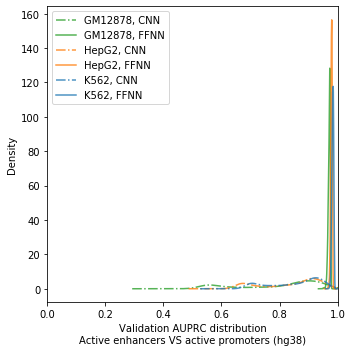

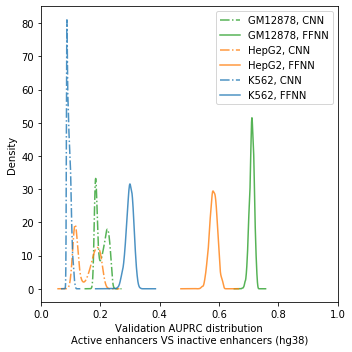

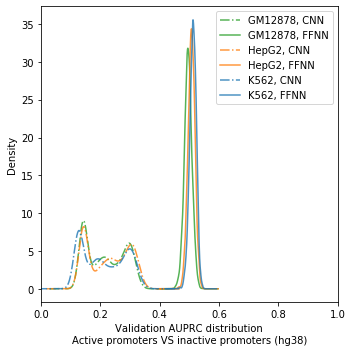

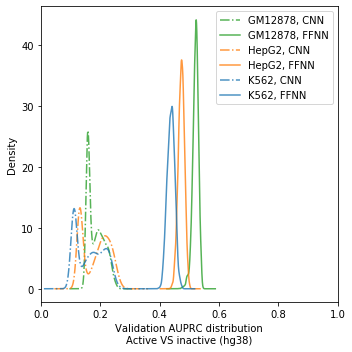

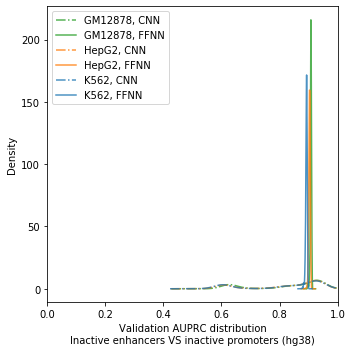

In [43]:
import os
import shutil
shutil.rmtree("densities")
os.makedirs("densities", exist_ok=True)
for (task), group in all_csv.groupby(["task"]):
    group = group.dropna(axis=1)
    columns = [
        column
        for column in group.columns
        if column not in metrics
    ] + metrics
    # Resorting the dataframe
    group = group[columns]
    for (cell_line, model), subgroup in group.groupby(["cell_line", "model"]):
        if cell_line in wasserman_cell_lines:
            if model == "MLP":
                model = "FFNN"
            subgroup.AUPRC.plot.kde(
                alpha=0.8,
                figsize=(5, 5),
                label=f"{cell_line}, {model}",
                color=colors[wasserman_cell_lines.index(cell_line)],
                linestyle="-." if model == "CNN" else "-"
            )
    plt.xlim(0, 1)
    plt.legend()
    plt.xlabel("Validation AUPRC distribution\n{} (hg38)".format(sanitize_ml_labels(task)))
    plt.tight_layout()
    plt.savefig(f"./densities/{task}.jpg")
    plt.show()